In [1]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('../Datasets/Preprocessed_Combined_Dataset.csv')
df.head(10)

,Individuals_Affected,State_AL,State_AR,State_AZ,State_CA,State_CO,State_CT,State_DC,State_DE,State_FL,...,"Loc_of_Breached_Information_Other Portable Electronic Device, Other","Loc_of_Breached_Information_Other Portable Electronic Device, Other, Electronic Medical Record","Loc_of_Breached_Information_Other Portable Electronic Device, Paper/Films","Loc_of_Breached_Information_Other, Electronic Medical Record","Loc_of_Breached_Information_Other, Other Portable Electronic Device","Loc_of_Breached_Information_Other, Paper","Loc_of_Breached_Information_Other, Paper/Films",Loc_of_Breached_Information_Paper,Loc_of_Breached_Information_Paper/Films,Business_Associate_Present_Yes
0,-0.034650,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,-0.054628,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,-0.028223,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,-0.054944,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,-0.053222,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,-0.054776,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
6,-0.053726,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,0.105564,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,-0.033058,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,-0.046678,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Declaring Feature vector and target variable

In [3]:
X = df.drop(['Business_Associate_Present_Yes'], axis=1)
# print(X.columns)
y = df['Business_Associate_Present_Yes']
# lab = LabelEncoder()
# y_encoded = lab.fit_transform(y)

## Splitting data into separate training and test set

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)
cols = X_train.columns
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)
# X_train = pd.DataFrame(X_train, columns=[cols])
# X_test = pd.DataFrame(X_test, columns=[cols])

In [5]:
X_train.shape, X_test.shape

((3139, 191), (1047, 191))

## Implementing SVM with default hyperparameters
- Will display the models result as well as current `model accuracy`

In [6]:
svc = SVC()
svc.fit(X_train, y_train)
y_pred = svc.predict(X_test)
print('Models accuracy score with default hyperparameters: {0:0.4}'. format(accuracy_score(y_test, y_pred)))

Models accuracy score with default hyperparameters: 0.8825


### Running RBF Kernal and c = 100.0

In [7]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=100.0 : 0.8739


### Run SVM with rbf kernel and C = 1000.0

In [8]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with rbf kernel and C=1000.0 : 0.8749


## Run SVM with a linear kernel

#### Run SVM with linear kernel and C = 1.0

In [9]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.8768


#### Run SVM with linear kernel and c = 100.0

In [10]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with linear kernel and C=100.0 : 0.8777


#### Run SVM with linear kernel and C = 1000.0

In [11]:
linear_svc1000=SVC(kernel='linear', C=1000.0) 

# fit classifier to training set
linear_svc1000.fit(X_train, y_train)

# make predictions on test set
y_pred=linear_svc1000.predict(X_test)

# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with linear kernel and C=1000.0 : 0.8777


## Confusion matrix

In [7]:
cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
print('\nTrue Positives(TP) = ', cm[0,0])
print('\nTrue Negatives(TN) = ', cm[1,1])
print('\nFalse Positives(FP) = ', cm[0,1])
print('\nFalse Negatives(FN) = ', cm[1,0])

Confusion matrix

 [[796   8]
 [115 128]]

True Positives(TP) =  796

True Negatives(TN) =  128

False Positives(FP) =  8

False Negatives(FN) =  115


#### Visualize Confusion Matrix

<AxesSubplot:>

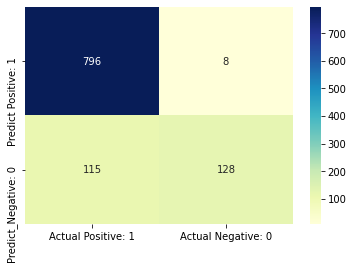

In [8]:
# Utilize this library for stastical data visulaization
import seaborn as sns 
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive: 1', 'Actual Negative: 0'], index=['Predict Positive: 1', 'Predict_Negative: 0'])
sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')


### Classification Accuracy

In [9]:
# Visualize the classification accruacy within our model
TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

In [11]:
# print classification accuracy
class_acc = (TP + TN) / float(TP + TN + FP + FN)
print('Classification Accuracy: {0:0.4f}'.format(class_acc))

Classification Accuracy: 0.8825


#### Precision
- Defined as the percentage of correctly predicted positive outcomes out of all the predicted positive outcomes
- Ratio: TP / (TP+FP)

In [12]:
precision = TP / float(TP + FP)
print('Precision: {0:04f}'.format(precision))

Precision: 0.990050
